In [1]:
import piplite
await piplite.install(['pandas', 'matplotlib', 'seaborn', 'numpy'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyodide.http import open_url

# Loading the menu dataset
try:
    df = pd.read_csv(open_url('menu.csv'))
    print("Success: menu.csv loaded!")
except:
    df = pd.read_csv('menu.csv')

# Quick look at the data
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [2]:
# Statistical summary of calories, fat, protein, etc.
print(df.describe())

# Check for any missing values
print(df.isnull().sum())

# List the food categories (Breakfast, Beef & Pork, etc.)
print(df['Category'].unique())

          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

In [3]:
# Highest calorie item in the whole menu
max_cal_item = df.loc[df['Calories'].idxmax()]
print(f"Highest Calorie Item: {max_cal_item['Item']} ({max_cal_item['Calories']} cal)")

# Average Calories per Category
avg_calories = df.groupby('Category')['Calories'].mean().sort_values(ascending=False)
print("\nAvg Calories by Category:\n", avg_calories)

Highest Calorie Item: Chicken McNuggets (40 piece) (1880 cal)

Avg Calories by Category:
 Category
Chicken & Fish        552.962963
Smoothies & Shakes    531.428571
Breakfast             526.666667
Beef & Pork           494.000000
Coffee & Tea          283.894737
Salads                270.000000
Snacks & Sides        245.769231
Desserts              222.142857
Beverages             113.703704
Name: Calories, dtype: float64


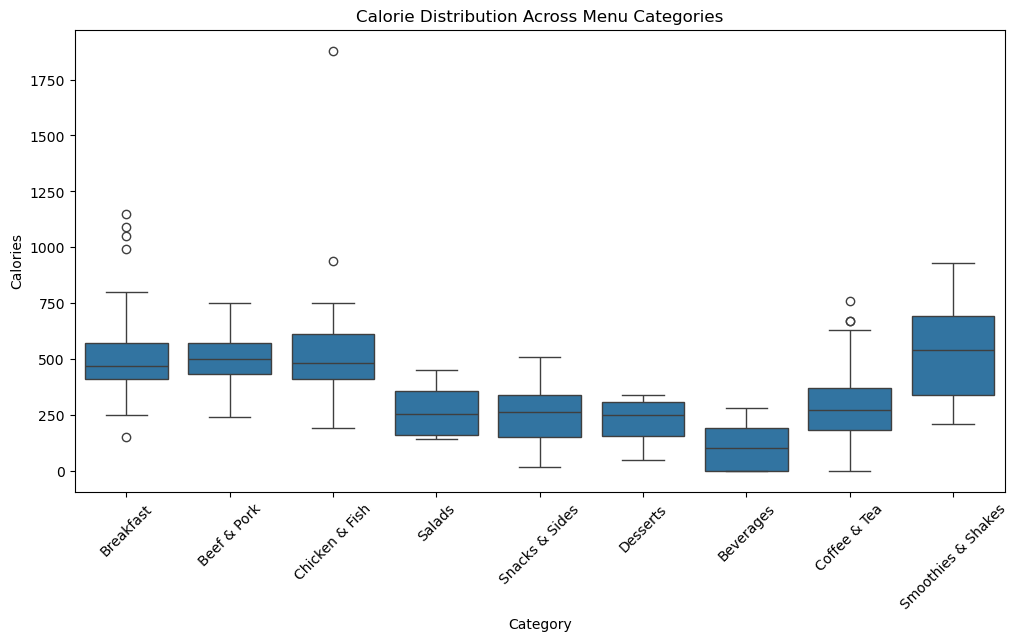

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Calories', data=df)
plt.xticks(rotation=45)
plt.title('Calorie Distribution Across Menu Categories')
plt.show()

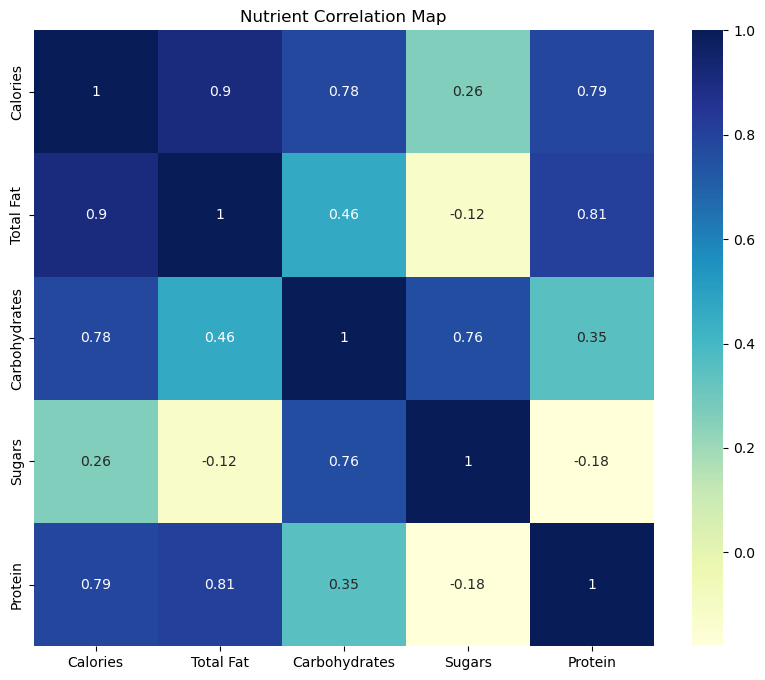

In [5]:
# Selecting main nutrients for correlation
nutrients = df[['Calories', 'Total Fat', 'Carbohydrates', 'Sugars', 'Protein']]
plt.figure(figsize=(10, 8))
sns.heatmap(nutrients.corr(), annot=True, cmap='YlGnBu')
plt.title('Nutrient Correlation Map')
plt.show()

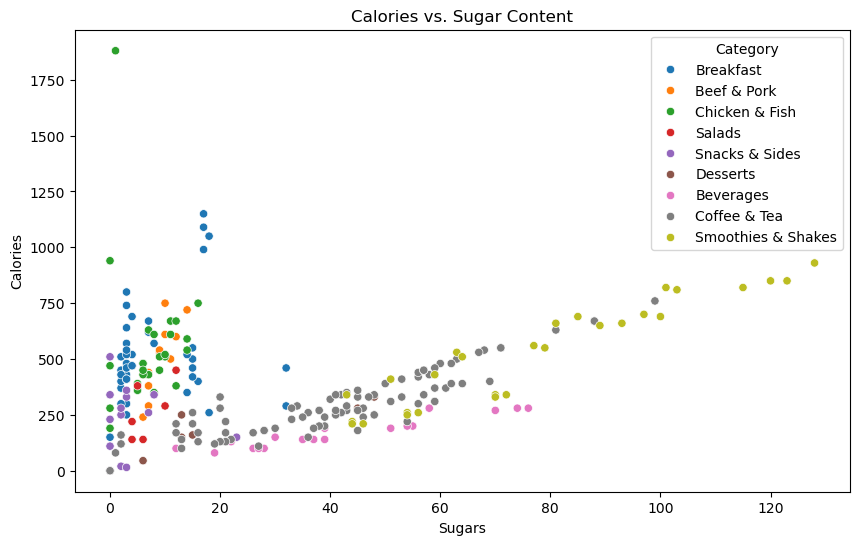

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sugars', y='Calories', hue='Category', data=df)
plt.title('Calories vs. Sugar Content')
plt.show()